In [1]:
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Supir", "Mancing", "Pria"), ("Budi", 23, "Nelayan", "Mancing", "Pria"), ("Citra", 29, "Petani", "Mancing", "Wanita"), ("Dina", 45, "Programmer", "Mancing", "Wanita")]
columns = ["Nama", "Usia","Pekerjaan","Hobi","Gender"]

df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

+-----+----+----------+-------+------+
| Nama|Usia| Pekerjaan|   Hobi|Gender|
+-----+----+----------+-------+------+
|  Ali|  34|     Supir|Mancing|  Pria|
| Budi|  23|   Nelayan|Mancing|  Pria|
|Citra|  29|    Petani|Mancing|Wanita|
| Dina|  45|Programmer|Mancing|Wanita|
+-----+----+----------+-------+------+



In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, desc

# Memulai Spark session dengan konfigurasi tambahan (opsional)
spark = SparkSession.builder .appName("BigDataPractice") .config("spark.sql.shuffle.partitions", "4") .getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame dengan format yang lebih baik
df.show(truncate=False)

# Filtering data: Mengambil data dengan usia lebih dari 30
df_filtered = df.filter(col("Usia") > 30)
print("Data yang berusia di atas 30 tahun:")
df_filtered.show()

# Menghitung rata-rata usia
avg_age = df.select(avg("Usia")).collect()[0][0]
print("Rata-rata usia:", avg_age)

# Mengurutkan data berdasarkan usia secara descending
df_sorted = df.orderBy(desc("Usia"))
print("Data yang diurutkan berdasarkan usia (descending):")
df_sorted.show()

+-----+----+
|Nama |Usia|
+-----+----+
|Ali  |34  |
|Budi |23  |
|Citra|29  |
|Dina |45  |
+-----+----+

Data yang berusia di atas 30 tahun:
+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

Rata-rata usia: 32.75
Data yang diurutkan berdasarkan usia (descending):
+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [26]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Menambahkan kolom baru "Kota"
df_pandas['Kota'] = ['Jakarta', 'Bandung', 'Surabaya', 'Yogyakarta']

# Menampilkan DataFrame yang sudah dimodifikasi
df_pandas

# Menyaring data dengan usia lebih dari 30 tahun dan tinggal di Jakarta
df_filtered = df_pandas[(df_pandas['Usia'] > 30) & (df_pandas['Kota'] == 'Jakarta')]
df_filtered

# Mengurutkan data berdasarkan usia secara descending dan kota secara ascending
df_sorted = df_pandas.sort_values(by=['Usia'], ascending=[False])
df_sorted

,Nama,Usia,Kota
3,Dina,45,Yogyakarta
0,Ali,34,Jakarta
2,Citra,29,Surabaya
1,Budi,23,Bandung


    Nama  Usia Pekerjaan
0    Ali    34    Dokter
1   Budi    23      Guru
2  Citra    29  Insinyur
3   Dina    45   Perawat
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


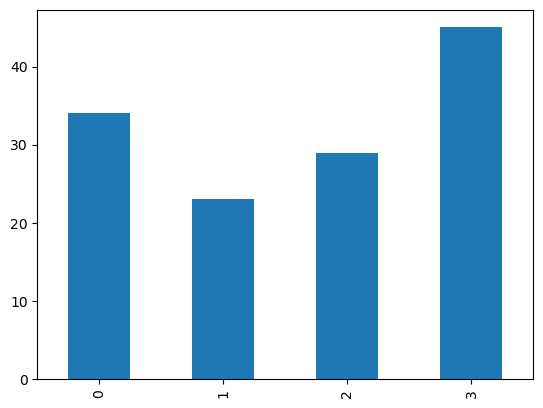

,Nama,Usia,Pekerjaan
0,Ali,34,Dokter
1,Budi,23,Guru
2,Citra,29,Insinyur
3,Dina,45,Perawat


In [27]:
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Pekerjaan": ["Dokter", "Guru", "Insinyur", "Perawat"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

#Visualisasi pandas
df_joined


In [37]:
from pyspark.sql import SparkSession
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Eko", 25), ("Fani", 30)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Gani", 32], "Usia": [28,25]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

df_pandas_from_spark

# Menggabungkan DataFrame Pandas
df_gabungan = pd.concat([df_pandas, df_pandas_from_spark], ignore_index=True)

# Mengonversi kembali ke DataFrame PySpark
df_gabungan_spark = spark.createDataFrame(df_gabungan)

# Menampilkan DataFrame hasil konversi
df_pandas_from_spark, df_gabungan_spark.show()

# Menghitung rata-rata usia
rata_rata_usia = df_gabungan_spark.select(avg("Usia")).collect()[0][0]
print("Rata-rata usia:", rata_rata_usia)

+----+----+
|Nama|Usia|
+----+----+
|Gani|  28|
|  32|  25|
| Eko|  25|
|Fani|  30|
+----+----+

Rata-rata usia: 27.0


In [45]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import max  # Import the max function
import pandas as pd

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame PySpark
data_spark = [("Ali", 34), ("Budi", 23), ("Citra", 29)]
columns_spark = ["Nama", "Usia"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Dina", "Eko"], "Usia": [45, 25]}
df_pandas = pd.DataFrame(data_pandas)

# Mengonversi DataFrame PySpark ke Pandas
df_pandas_from_spark = df_spark.toPandas()

# Menggabungkan DataFrame Pandas
df_gabungan_pandas = pd.concat([df_pandas, df_pandas_from_spark], ignore_index=True)

# Mengonversi kembali ke DataFrame PySpark
df_gabungan_spark = spark.createDataFrame(df_gabungan_pandas)

df_gabungan_spark.show()
# Menghitung nilai maksimum usia
nilai_maks_usia = df_gabungan_spark.select(max("Usia")).collect()[0][0]
print("Nilai maksimum usia:", nilai_maks_usia)


+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Eko|  25|
|  Ali|  34|
| Budi|  23|
|Citra|  29|
+-----+----+

Nilai maksimum usia: 45
